#  &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; &emsp;&emsp;&emsp;&emsp;&emsp;&emsp; &emsp;&emsp;&emsp; &emsp;&emsp;                                EAS 503 Project
## &emsp;&emsp;&emsp;&emsp; &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;                              Google Analytics Customer Revenue Prediction


## &emsp;&emsp;&emsp;&emsp;&emsp; &emsp;&emsp;&emsp;&emsp;&emsp;&emsp; &emsp;&emsp;&emsp;                                       Abhishek Kumar, Narendra Badam

### Dataset (903653 rows, 12 columns, 1year data)
### Variables
#### 1. fullVisitorId - `A unique identifier for each user of the Google Merchandise Store.`
#### 2. channelGrouping - `The channel via which the user came to the Store.`
#### 3. date - `The date on which the user visited the Store.`
#### 4. device(Json) - `The specifications for the device used to access the Store.`
#### 5. geoNetwork(Json) - `This section contains information about the geography of the user.`
#### 6. sessionId - `A unique identifier for this visit to the store.`
#### 7. socialEngagementType - `Engagement type, either "Socially Engaged" or "Not Socially Engaged".`
#### 8. totals(Json) - `This section contains aggregate values across the session.`
#### 9. trafficSource - `This section contains information about the Traffic Source from which the session originated.`
#### 10. visitId - `An identifier for this session.  This is only unique to the user. `
#### 11. visitNumber - `The session number for this user. If this is the first session, then this is set to 1.`
#### 12. visitStartTime - `The timestamp (expressed as POSIX time).`

### Problem Statement
> #### Predict revenue generated per customer for next financial year

### Motivation
 > #### > Not a typical time-series analysis problem
 > #### > Identification of important variables that segment revenue generating customers from non-revenue generating customers.
 > #### > This analysis may lead to actionable operational changes increasing marketing efficiency

In [6]:
import pymysql.cursors
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

connection = pymysql.connect(host='localhost',
                             user='root',
                             password='iwilld0it',
                             db='gan',
                             charset='utf8mb4',
                             cursorclass=pymysql.cursors.DictCursor)

df1 = pd.read_sql("SELECT COUNT(*) FROM gan_train", con=connection)

In [3]:
total_users = pd.read_sql("SELECT DATE(date) AS date, COUNT(totals_transactionRevenue) AS Total_Visitors FROM gan_train GROUP BY DATE(date);", con=connection)
total_users_with_transaction = pd.read_sql("SELECT COUNT(aa.transaction), date  FROM (SELECT DATE(date) AS date, totals_transactionRevenue AS transaction FROM gan_train WHERE totals_transactionRevenue>0) aa GROUP BY date;", con=connection)
total_users.index = pd.to_datetime(total_users["date"])
total_users = total_users.drop(["date"], axis=1)
total_users_with_transaction.index = pd.to_datetime(total_users_with_transaction["date"])
total_users_with_transaction = total_users_with_transaction.drop(["date"], axis=1)

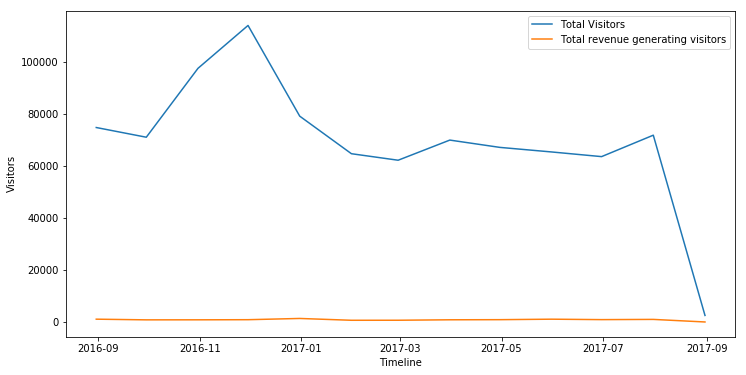

In [47]:
fig = plt.figure(figsize=[12,6])
_ = plt.plot(total_users.resample("M").sum())
_ = plt.plot(total_users_with_transaction.resample("M").sum())
_ = plt.xlabel("Timeline")
_ = plt.ylabel("Visitors")
_ = plt.legend(('Total Visitors', 'Total revenue generating visitors'), loc='upper right')

### Inferences :
> ####  Only 9996 unique customers generated revenue against 714167 unique customers ~ 1.39%

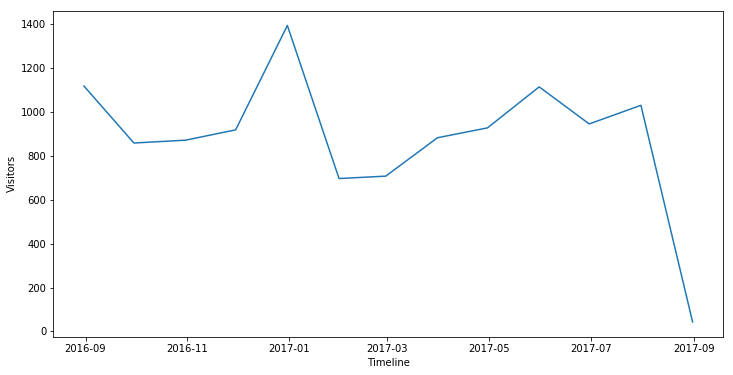

In [57]:
fig = plt.figure(figsize=[12,6])
_ = plt.plot(total_users_with_transaction.resample("M").sum())
_ = plt.xlabel("Timeline")
_ = plt.ylabel("Visitors")


## Characteristics of Customers visiting the Google Store 

### Geography

In [14]:
##Country wise frequency of visitors
visfreq_country = pd.read_sql("SELECT geoNetwork_country, COUNT(DISTINCT fullVisitorID) AS vis_cnt FROM gan_train GROUP BY geoNetwork_country ;", con=connection)


##Plotting countries by visitor count

from plotly.plotly import iplot

import plotly

plotly.tools.set_credentials_file(username='viratkohli', api_key='6uCvtW9kXCrjXEfiXu5d')

var2 = visfreq_country.groupby("geoNetwork_country").agg({"vis_cnt" : "mean"}).reset_index()



colorscale = [[0, 'rgb(102,194,165)'], [0.005, 'rgb(102,194,165)'], 
              [0.01, 'rgb(171,221,164)'], [0.02, 'rgb(230,245,152)'], 
              [0.04, 'rgb(255,255,191)'], [0.05, 'rgb(254,224,139)'], 
              [0.10, 'rgb(253,174,97)'], [0.25, 'rgb(213,62,79)'], [1.0, 'rgb(158,1,66)']]

data = [ dict(
        type = 'choropleth',
        autocolorscale = False,
        colorscale = colorscale,
        showscale = True,
        locations = var2.geoNetwork_country,
        z = var2.vis_cnt,
        locationmode = 'country names',
        text = var2.vis_cnt,
        marker = dict(
            line = dict(color = '#fff', width = 2)) )           ]

layout = dict(
    height=750,
    title = 'Visitor count by Countries',
    geo = dict(
        showframe = True,
        showocean = True,
        oceancolor = 'light blue',
        projection = dict(
        type = 'equirectangular',
            rotation = dict(
                    lon = 50,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = False,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = False,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )
fig = dict(data=data, layout=layout)
iplot(fig)



In [24]:
from plotly.plotly import iplot
import plotly
plotly.tools.set_credentials_file(username='viratkohli', api_key='6uCvtW9kXCrjXEfiXu5d')

rev_country = pd.read_sql("SELECT geoNetwork_country,ROUND(AVG(totals_transactionRevenue)) AS mean_rev_country FROM gan_train GROUP BY geoNetwork_country HAVING AVG(totals_transactionRevenue) >0; ", con=connection)
var = rev_country.groupby("geoNetwork_country").agg({"mean_rev_country" : "mean"}).reset_index()


colorscale = [[0, 'rgb(102,194,165)'], [0.005, 'rgb(102,194,165)'], 
              [0.01, 'rgb(171,221,164)'], [0.02, 'rgb(230,245,152)'], 
              [0.04, 'rgb(255,255,191)'], [0.05, 'rgb(254,224,139)'], 
              [0.10, 'rgb(253,174,97)'], [0.25, 'rgb(213,62,79)'], [1.0, 'rgb(158,1,66)']]

data = [ dict(
        type = 'choropleth',
        autocolorscale = False,
        colorscale = colorscale,
        showscale = True,
        locations = var.geoNetwork_country,
        z = var.mean_rev_country,
        locationmode = 'country names',
        text = var.mean_rev_country,
        marker = dict(
            line = dict(color = '#fff', width = 2)) )           ]

layout = dict(
    height=750,
    title = 'Mean Revenue per customer by Countries',
    geo = dict(
        showframe = True,
        showocean = True,
        oceancolor = 'lightblue',
        projection = dict(
        type = 'equirectangular',
            rotation = dict(
                    lon = 60,
                    lat = 20),
        ),
        lonaxis =  dict(
                showgrid = False,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = False,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )

fig = dict(data=data, layout=layout)
iplot(fig)


In [61]:
meanrev_country_ranking = pd.read_sql("SELECT * FROM (SELECT d.country AS Country, ROUND(d.mean_rev) AS total_rev, dense_rank() OVER (ORDER BY d.mean_rev DESC) AS ranking FROM (SELECT geoNetwork_country AS country ,SUM(totals_transactionRevenue) AS mean_rev FROM gan_train GROUP BY geoNetwork_country HAVING AVG(totals_transactionRevenue)>0)d )k where k.ranking<=10;", con=connection)
meanrev_country_ranking["total_rev"] = np.log(meanrev_country_ranking["total_rev"].astype(int))
meanrev_country_ranking

,Country,total_rev,ranking
0,United States,28.004266,1
1,Canada,24.214442,2
2,Venezuela,23.316646,3
3,Japan,22.629691,4
4,Kenya,22.385049,5
5,Nigeria,21.917915,6
6,Taiwan,21.376054,7
7,Indonesia,21.333238,8
8,Australia,21.280169,9
9,United Kingdom,21.247669,10


### Device Information

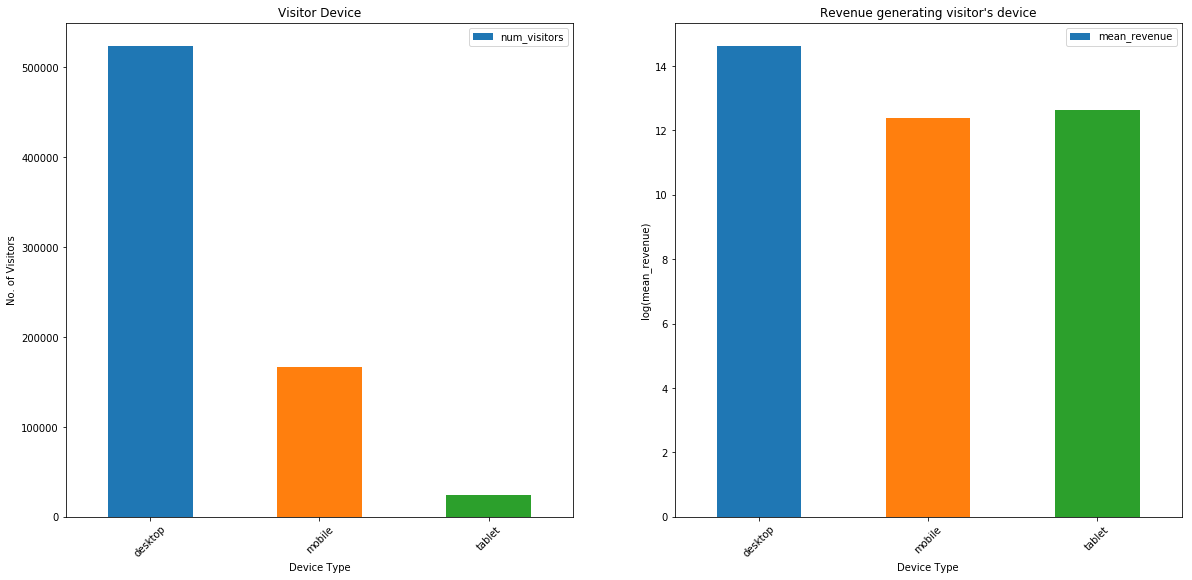

In [91]:
##Device wise visit and mean revenue
device_dis = pd.read_sql("SELECT device_deviceCategory AS device_type, COUNT(DISTINCT fullvisitorid) AS num_visitors, ROUND(AVG(totals_transactionRevenue)) AS mean_revenue FROM gan_train GROUP BY device_deviceCategory HAVING AVG(totals_transactionRevenue)>0;", con=connection)
device_dis["mean_revenue"] = np.log(device_dis["mean_revenue"].astype(int))
ax1 = plt.subplot(221)
_ = device_dis.plot.bar(x='device_type', y='num_visitors', ax=ax1, figsize=(20, 20), title='Visitor Device')
_ = plt.xlabel("Device Type")
_ = plt.ylabel("No. of Visitors")
plt.xticks(rotation=45)

ax2 = plt.subplot(222)
_ = device_dis.plot(kind = "bar", x='device_type', y='mean_revenue', ax=ax2, figsize=(20, 20), title="Revenue generating visitor's device")
plt.xticks(rotation=45)
_ = plt.xlabel("Device Type")
_ = plt.ylabel("log(mean_revenue)")

plt.show()

### Inferences :
> #### > Most of the visitors use Desktop to visit Google Store
> #### > High proportion of users using tablets generate revenue

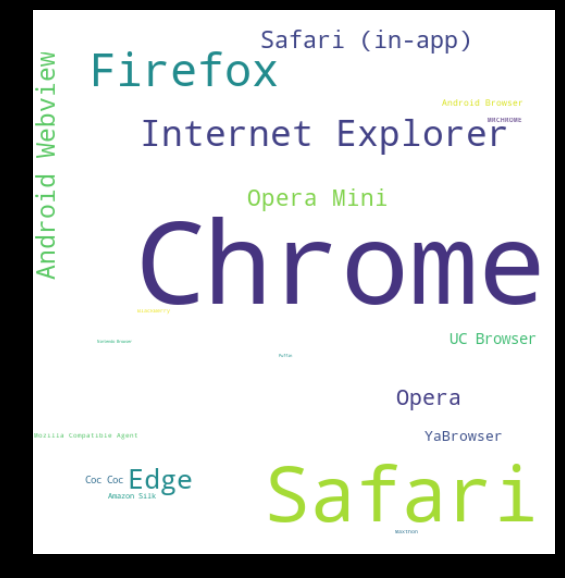

In [50]:
##Browser wise visitor count
from wordcloud import WordCloud

visfreq_browser = pd.read_sql("SELECT device_browser, COUNT(DISTINCT fullVisitorID) AS visitor_cnt FROM gan_train GROUP BY device_browser ;", con=connection)
d = {}    ##visfreq_browser_wordcloud since no good visualization using a  bar chart
for a, x in visfreq_browser.values:
    d[a] = x
wordcloud = WordCloud(width=480, height=500, background_color="white")
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure(figsize=(30,10), facecolor='k')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

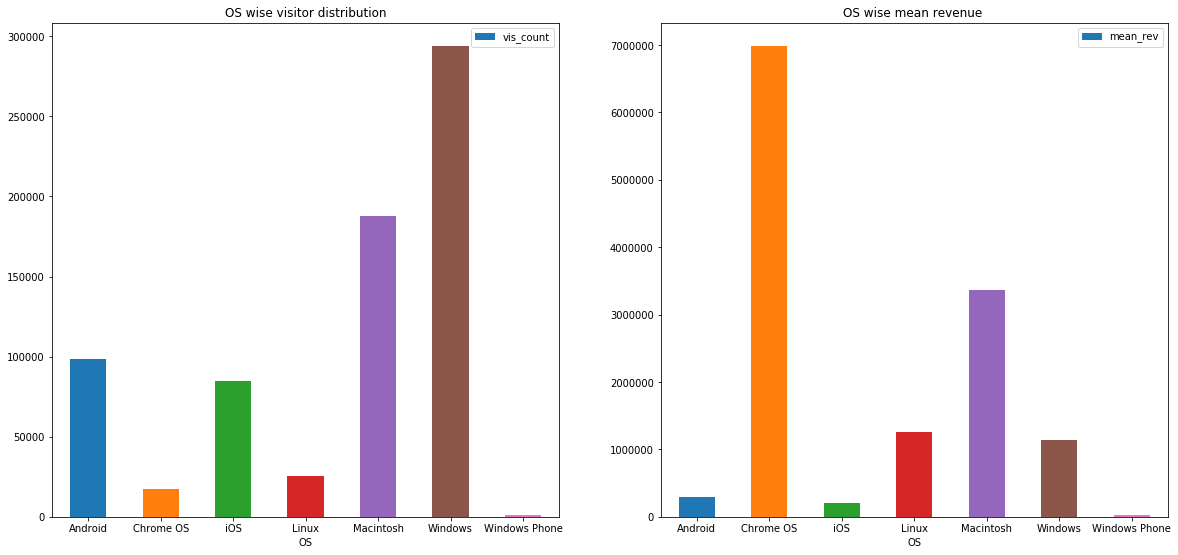

In [25]:
##OS wise mean revenue and visiotr count

os_dis=pd.read_sql("SELECT device_operatingSystem AS OS, COUNT(DISTINCT(fullVisitorId)) AS vis_count, ROUND(AVG(totals_transactionRevenue)) AS mean_rev FROM gan_train GROUP BY device_operatingSystem HAVING AVG(totals_transactionRevenue)>0;", con=connection)

ax1 = plt.subplot(221)
_ = os_dis.plot.bar(x='OS', y='vis_count', ax=ax1, figsize=(20, 20), title='OS wise visitor distribution')
_ = plt.xticks(rotation=0)
ax2 = plt.subplot(222)
_ = os_dis.plot.bar(x='OS', y='mean_rev', ax=ax2, figsize=(20, 20), title='OS wise mean revenue ')
_ = plt.xticks(rotation=0)

### Inference:
> #### > Less number of visitors use Chrome OS but those who use generate large chunk of revenue; probably are loyal Google customers 

### Visitor Traffic

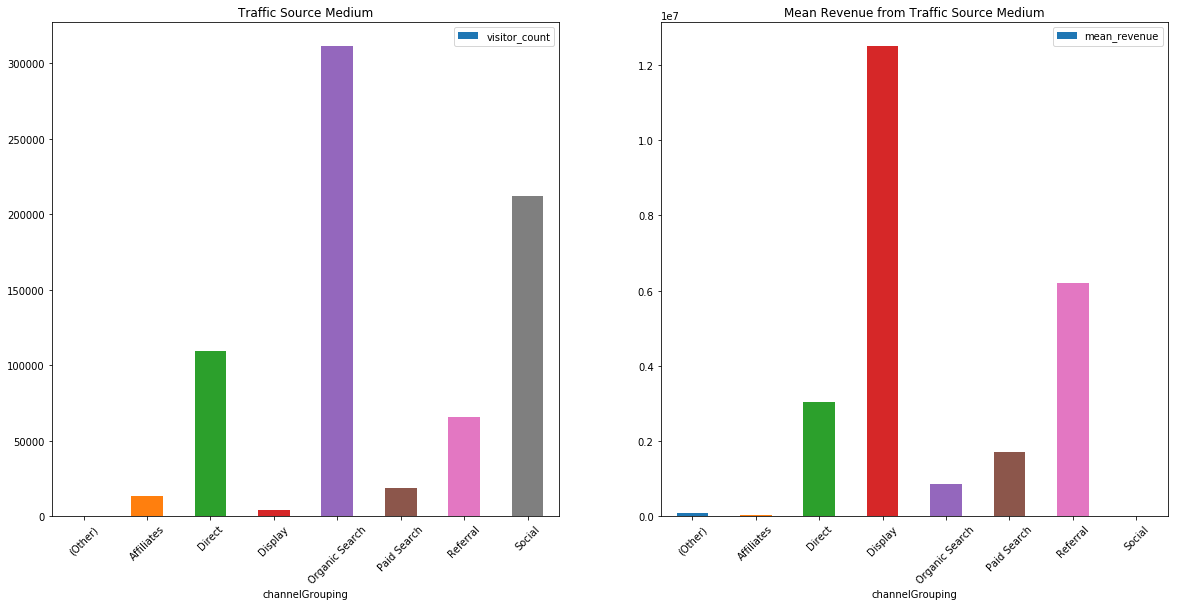

In [26]:
## channel grouping frequency and  mean revenue
import warnings
warnings.filterwarnings('ignore')

cgdis = pd.read_sql("SELECT channelGrouping, COUNT(DISTINCT fullVisitorID) AS visitor_count, ROUND(AVG(totals_transactionRevenue)) AS mean_revenue FROM gan_train GROUP BY channelGrouping HAVING AVG(totals_transactionRevenue)>0 ORDER BY channelGrouping;", con=connection)

_ = ax1 = plt.subplot(221)
_ = cgdis.plot.bar(x='channelGrouping', y='visitor_count', ax=ax1, figsize=(20, 20), title='Traffic Source Medium')
_ = plt.xticks(rotation=45)

_ = ax2 = plt.subplot(222)
_ = cgdis.plot.bar(x='channelGrouping', y='mean_revenue', ax=ax2, figsize=(20, 20), title='Mean Revenue from Traffic Source Medium')

_ = plt.xticks(rotation=45)


### Inference :
> #### > Most of the traffic is through organic search
> #### > Most of the customers transact when they arrive via Display ads or Referrals

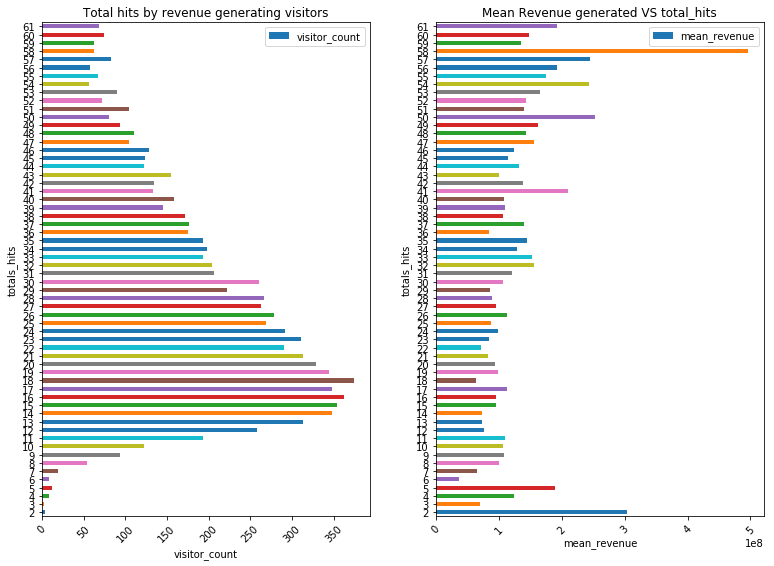

In [21]:
total_hits_count_n_rev = pd.read_sql("SELECT totals_hits, count(fullvisitorid) as visitor_count ,AVG(totals_transactionRevenue) as mean_revenue FROM gan_train WHERE totals_transactionRevenue>0 GROUP BY totals_hits ORDER BY totals_hits;", con=connection)

ax4 = plt.subplot(231)
_ = total_hits_count_n_rev.head(60).plot.barh(x='totals_hits', y = 'visitor_count', ax=ax4, figsize=(20, 20),title='Total hits by revenue generating visitors')
_=plt.xticks(rotation=45)
_ = ax4.set_xlabel('visitor_count')
_ = ax4.set_ylabel('totals_hits')

ax5 = plt.subplot(232)
_ = total_hits_count_n_rev.head(60).plot.barh(x='totals_hits', y = 'mean_revenue', ax=ax5, figsize=(20, 20),title='Mean Revenue generated VS total_hits')
_=plt.xticks(rotation=45)
_ = ax5.set_xlabel('mean_revenue')
_ = ax5.set_ylabel('totals_hits')

### Inferences :
> #### > Most of the revenue generating customers have total_hits in range (10,40)
> #### >No particular pattern to identify high revenue generating customers

Text(0,0.5,'pageviews')

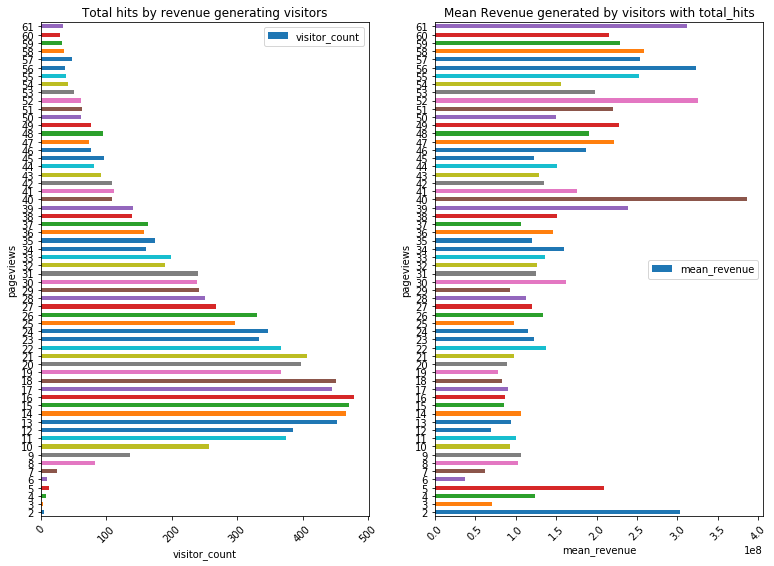

In [17]:
page_views_count_n_rev = pd.read_sql("SELECT totals_pageviews AS pageviews, COUNT(fullvisitorid) AS visitor_count ,AVG(totals_transactionRevenue) AS mean_revenue FROM gan_train WHERE totals_transactionRevenue>0 GROUP BY totals_pageviews ORDER BY totals_pageviews ;", con=connection)

ax6 = plt.subplot(231)
page_views_count_n_rev.head(60).plot.barh(x='pageviews', y = 'visitor_count', ax=ax6, figsize=(20, 20),title='Total pageviews by revenue generating visitors')
_=plt.xticks(rotation=45)
ax6.set_xlabel('visitor_count')
ax6.set_ylabel('pageviews')

ax7 = plt.subplot(232)
page_views_count_n_rev.head(60).plot.barh(x='pageviews', y = 'mean_revenue', ax=ax7, figsize=(20, 20),title='Mean Revenue generated by pageviews')
_=plt.xticks(rotation=45)
ax7.set_xlabel('mean_revenue')
ax7.set_ylabel('pageviews')

### Inference :
> #### > No particular pattern to identify high revenue generating customers

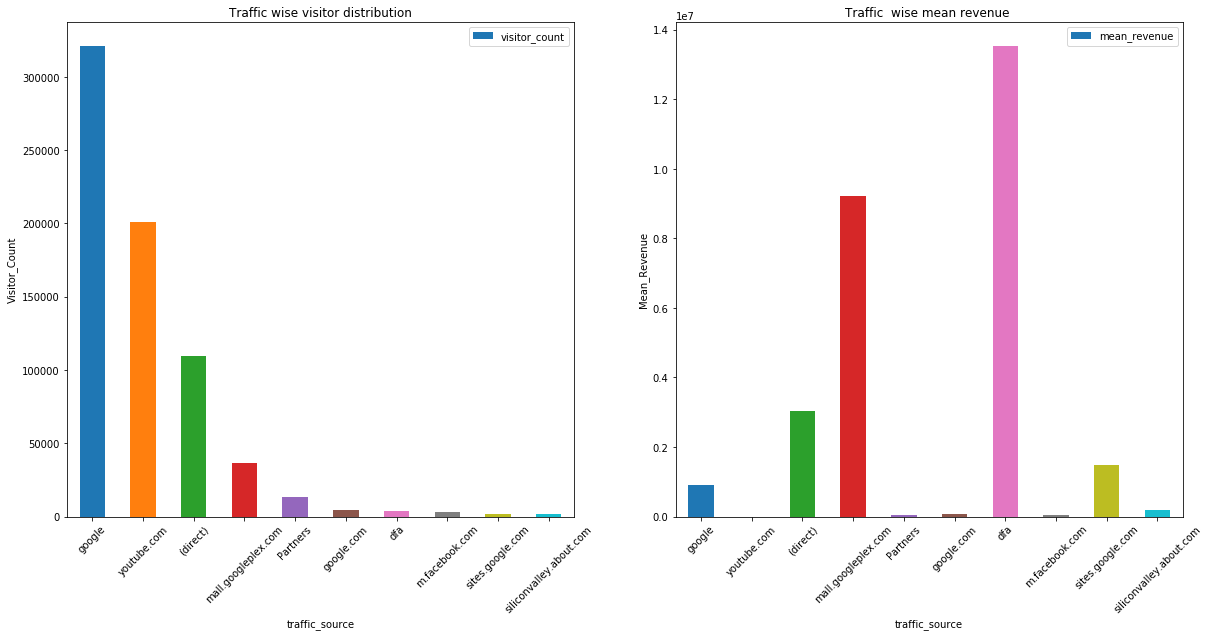

In [86]:
#Traffic source wise mean revenue and count
nwdis = pd.read_sql(" select trafficSource_source as traffic_source,count(distinct(fullVisitorId)) as visitor_count,round(avg(totals_transactionRevenue)) as mean_revenue from gan_train group by trafficSource_source having avg(totals_transactionRevenue)>0 order by visitor_count desc limit 10", con=connection)

ax1 = plt.subplot(221)
nwdis.plot.bar(x='traffic_source', y='visitor_count', ax=ax1, figsize=(20, 20), title='Traffic wise visitor distribution')
_=plt.xticks(rotation=45)
ax1.set_xlabel('traffic_source')
ax1.set_ylabel('Visitor_Count')

ax2 = plt.subplot(222)
nwdis.plot.bar(x='traffic_source', y='mean_revenue', ax=ax2, figsize=(20, 20), title='Traffic  wise mean revenue ')
ax2.set_xlabel('traffic_source')
ax2.set_ylabel('Mean_Revenue')

_= plt.xticks(rotation=45)

### Inference:
> #### > Most of the visitors land to google store via Google and Youtube 
> #### > Most of the visitors transact when they land via googleplex.com or dfa(DoubleClick for Advertisers) 

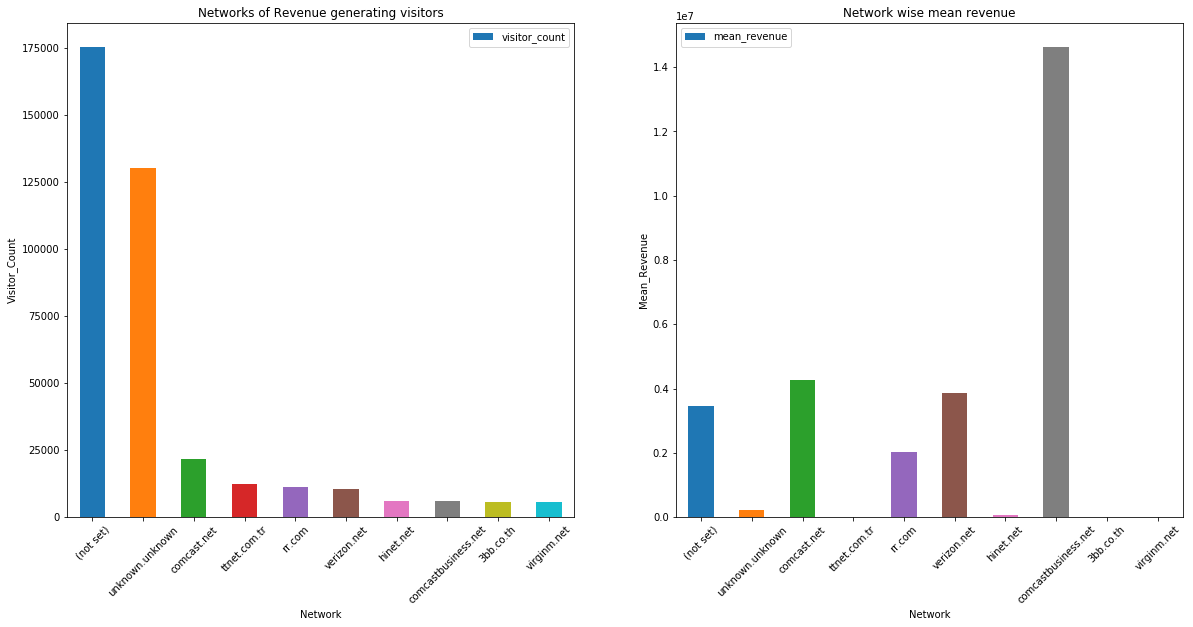

In [88]:
#network wise mean revenue and count
nwdis = pd.read_sql("SELECT geoNetwork_networkDomain AS network, COUNT(DISTINCT(fullVisitorId)) AS visitor_count, ROUND(AVG(totals_transactionRevenue)) AS mean_revenue FROM gan_train group BY network HAVING AVG(totals_transactionRevenue)>0 ORDER BY visitor_count DESC LIMIT 10;", con=connection)

ax1 = plt.subplot(221)
nwdis.plot.bar(x='network', y='visitor_count', ax=ax1, figsize=(20, 20), title='Networks of Revenue generating visitors')
_=plt.xticks(rotation=45)
ax1.set_xlabel('Network')
ax1.set_ylabel('Visitor_Count')

ax2 = plt.subplot(222)
nwdis.plot.bar(x='network', y='mean_revenue', ax=ax2, figsize=(20, 20), title='Network wise mean revenue')
ax2.set_xlabel('Network')
ax2.set_ylabel('Mean_Revenue')

_=plt.xticks(rotation=45)

### Inference :
> #### > Users who use 'comcast.net' or 'comcastbusiness.net' networks have high tendency to transact than others

### Future Direction
> #### > Implement Regression Trees and Boosting Algorithms
> #### > Can also use neural nets
> #### > Reduce the dimension(PCA), implement ridge or lasso regression